In [400]:
import pandas as pd
import numpy as np
import xgboost as xgb
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [430]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')

In [465]:
def get_feature_importance(model):
    Importance = model.get_fscore()
    Importance = list(Importance.items())
    Feature= []
    Score = []
    for each in Importance:
        Feature.append(each[0])
        Score.append(each[1])
    df = pd.DataFrame({'Feature':Feature,'Score':Score}).sort_values(by=['Score'],ascending=[0])
    return df  

def plot_importance(model):
    FImportance = get_feature_importance(model).iloc[0:50,]
    plt.figure()
    FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.show()
    

# Current best result. No other feature

In [431]:
# params = {
#     'eta': 0.05, ## Try 0.01,3,5
#     'max_depth': 5,## Try 4,5,6
#     'subsample': 0.7,
#     'colsample_bytree': 0.7,
#     'objective': 'reg:linear',
#     'eval_metric': 'rmse',
#     'silent': 1
# }
# xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
#     verbose_eval=50, show_stdv=False,seed=42)
# xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
# print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

# Add T-SNE features

In [432]:
tsne_results = np.load('tsne_all.npy')
train['tsne_1'] = tsne_results[:train.shape[0],0]
train['tsne_2'] = tsne_results[:train.shape[0],1]
test['tsne_1'] = tsne_results[train.shape[0]:,0]
test['tsne_2'] = tsne_results[train.shape[0]:,1]

# data cleaning accoring to https://www.kaggle.com/gunjaagarwal/final-xgboost-try/code

In [433]:
bad_index = train[train.life_sq > train.full_sq].index
train.ix[bad_index, "life_sq"] = np.NaN

# equal_index = [601,1896,2791]
# test.ix[equal_index, "life_sq"] = test.ix[equal_index, "full_sq"]

bad_index = test[test.life_sq > test.full_sq].index
test.ix[bad_index, "life_sq"] = np.NaN

/Users/zhesun/.virtualenvs/venv2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
/Users/zhesun/.virtualenvs/venv2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [434]:
bad_index = train[train.life_sq < 5].index
train.ix[bad_index, "life_sq"] = np.NaN
bad_index = test[test.life_sq < 5].index
test.ix[bad_index, "life_sq"] = np.NaN

bad_index = train[train.full_sq < 5].index
train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[test.full_sq < 5].index
test.ix[bad_index, "full_sq"] = np.NaN

In [435]:
# kitch_is_build_year = [13117]
# train.ix[kitch_is_build_year, "build_year"] = train.ix[kitch_is_build_year, "kitch_sq"]

In [436]:
bad_index = train[train.kitch_sq >= train.life_sq].index
train.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = test[test.kitch_sq >= test.life_sq].index
test.ix[bad_index, "kitch_sq"] = np.NaN

In [437]:
bad_index = train[(train.kitch_sq == 0).values + (train.kitch_sq == 1).values].index
train.ix[bad_index, "kitch_sq"] = np.NaN
bad_index = test[(test.kitch_sq == 0).values + (test.kitch_sq == 1).values].index
test.ix[bad_index, "kitch_sq"] = np.NaN

In [438]:
bad_index = train[(train.full_sq > 210) & (train.life_sq / train.full_sq < 0.3)].index
train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[(test.full_sq > 150) & (test.life_sq / test.full_sq < 0.3)].index
test.ix[bad_index, "full_sq"] = np.NaN

In [439]:
bad_index = train[train.life_sq > 300].index
train.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN
bad_index = test[test.life_sq > 200].index
test.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN

In [440]:
train.product_type.value_counts(normalize= True)

0    0.638246
1    0.361754
Name: product_type, dtype: float64

In [441]:
test.product_type.value_counts(normalize= True)

 0    0.652310
 1    0.343383
-1    0.004307
Name: product_type, dtype: float64

In [442]:
bad_index = train[train.build_year < 1500].index
train.ix[bad_index, "build_year"] = np.NaN
bad_index = test[test.build_year < 1500].index
test.ix[bad_index, "build_year"] = np.NaN

bad_index = train[train.build_year > 2050].index
train.ix[bad_index, "build_year"] = np.NaN
bad_index = test[test.build_year > 2050].index
test.ix[bad_index, "build_year"] = np.NaN

In [443]:
bad_index = train[train.num_room == 0].index 
train.ix[bad_index, "num_room"] = np.NaN
bad_index = test[test.num_room == 0].index 
test.ix[bad_index, "num_room"] = np.NaN

In [444]:
# bad_index = [10076, 11621, 17764, 19390, 24007, 26713, 29172]
# train.ix[bad_index, "num_room"] = np.NaN
# bad_index = [3174, 7313]
# test.ix[bad_index, "num_room"] = np.NaN

In [445]:
bad_index = train[(train.floor == 0).values * (train.max_floor == 0).values].index
train.ix[bad_index, ["max_floor", "floor"]] = np.NaN
bad_index = train[train.floor == 0].index
train.ix[bad_index, "floor"] = np.NaN
bad_index = train[train.max_floor == 0].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.max_floor == 0].index
test.ix[bad_index, "max_floor"] = np.NaN
bad_index = train[train.floor > train.max_floor].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.floor > test.max_floor].index
test.ix[bad_index, "max_floor"] = np.NaN

In [446]:
train.floor.describe(percentiles= [0.9999])

count     30295.000000
mean          7.673081
std           5.319135
min           1.000000
50%           7.000000
99.99%       40.911800
max          77.000000
Name: floor, dtype: float64

In [447]:
# bad_index = [23584]
# train.ix[bad_index, "floor"] = np.NaN

In [448]:
train.material.value_counts()
test.material.value_counts()
train.state.value_counts()
bad_index = train[train.state == 33].index
train.ix[bad_index, "state"] = np.NaN
test.state.value_counts()

2.0    2662
1.0    2266
3.0    1913
4.0     127
Name: state, dtype: int64

In [449]:
# brings error down a lot by removing extreme price per sqm
train.loc[train.full_sq == 0, 'full_sq'] = 50
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

In [450]:
# Add month-year
train['timestamp'] = pd.to_datetime(train['timestamp'])
month_year = (train.timestamp.dt.month + train.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
train['month_year_cnt'] = month_year.map(month_year_cnt_map)

test['timestamp'] = pd.to_datetime(test['timestamp'])
month_year = (test.timestamp.dt.month + test.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
test['month_year_cnt'] = month_year.map(month_year_cnt_map)

In [451]:
# Add week-year count
week_year = (train.timestamp.dt.weekofyear + train.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
train['week_year_cnt'] = week_year.map(week_year_cnt_map)

week_year = (test.timestamp.dt.weekofyear + test.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
test['week_year_cnt'] = week_year.map(week_year_cnt_map)

In [452]:
# Add month and day-of-week
train['month'] = train.timestamp.dt.month
train['dow'] = train.timestamp.dt.dayofweek

test['month'] = test.timestamp.dt.month
test['dow'] = test.timestamp.dt.dayofweek

In [453]:
# Other feature engineering
train['rel_floor'] = train['floor'] / train['max_floor'].astype(float)
train['rel_kitch_sq'] = train['kitch_sq'] / train['full_sq'].astype(float)

test['rel_floor'] = test['floor'] / test['max_floor'].astype(float)
test['rel_kitch_sq'] = test['kitch_sq'] / test['full_sq'].astype(float)

train.apartment_name=train.sub_area.astype(str) + train['metro_km_avto'].astype(str)
test.apartment_name=test.sub_area.astype(str) + train['metro_km_avto'].astype(str)

train['room_size'] = train['life_sq'] / train['num_room'].astype(float)
test['room_size'] = test['life_sq'] / test['num_room'].astype(float)

# Add hand made feature, and tsne

In [454]:
def get_ratio_preschool(df):
    df['ratio_preschool'] = df['children_preschool'] / (df['children_school'] + 1)
    return df

train = get_ratio_preschool(train)
test = get_ratio_preschool(test)

In [455]:
def get_extra_area(df):
    df['extra_area'] = df['full_sq'] - df['life_sq']
    return df

train = get_extra_area(train)
test = get_extra_area(test)

In [456]:
def get_floor_ratio(df):
    df['floor_ratio'] = df['max_floor'] - df['floor']
    return df

train = get_floor_ratio(train)
test = get_floor_ratio(test)

In [457]:
def get_room_avg_size(df):
    df['room_avg_size'] = (df['life_sq'] - df['kitch_sq']) / (df['num_room'] + 1)
    return df

train = get_room_avg_size(train)
test = get_room_avg_size(test)

In [458]:
df_kremlin = pd.read_csv('subarea_from_kremlin.csv')
df_kremlin = df_kremlin[['sub_area', 'distance_from_kremlin']]

In [459]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
train_raw = pd.merge(train_raw, df_kremlin,how='left', on='sub_area')
test_raw = pd.merge(test_raw, df_kremlin,how='left', on='sub_area')
train['distance_from_kremlin'] = train_raw['distance_from_kremlin']
test['distance_from_kremlin'] = test_raw['distance_from_kremlin']

# Processing after feature analysis

In [462]:
bad_index = train[train.build_year > 2050].index
train.ix[bad_index, "build_year"] = np.NaN
bad_index = test[test.build_year > 2050].index
test.ix[bad_index, "build_year"] = np.NaN

bad_index = train[train['extra_area']<0].index
train.ix[bad_index, "extra_area"] = np.NaN
bad_index = test[test['extra_area']<0].index
test.ix[bad_index, "extra_area"] = np.NaN


bad_index = train[train['room_avg_size']<0].index
train.ix[bad_index, "room_avg_size"] = np.NaN
bad_index = test[test['room_avg_size']<0].index
test.ix[bad_index, "room_avg_size"] = np.NaN


bad_index = train[train['floor_ratio']<0].index
train.ix[bad_index, "floor_ratio"] = np.NaN
bad_index = test[test['floor_ratio']<0].index
test.ix[bad_index, "floor_ratio"] = np.NaN


## Add macro features

In [460]:
# macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
# "micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
# "income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

# df_macro = pd.read_csv("macro_c.csv",  usecols=['timestamp'] + macro_cols)

# train = pd.merge_ordered(train, df_macro, on='timestamp', how='left')
# test = pd.merge_ordered(test, df_macro, on='timestamp', how='left')

# drop_lst = ['museum_visitis_per_100_cap']
# train = train.drop(drop_lst, axis=1)
# test = test.drop(drop_lst, axis=1)

# Add interaction term

In [468]:
col = list(test.columns)[2:]
label = train['price_doc']* .968 + 10
dtrain = xgb.DMatrix(train[col],label)
model = xgb.train(params,dtrain,num_boost_round=300)

## First get top 30 features

In [475]:
feature_importance = get_feature_importance(model)
N = 30
topN_features = feature_importance.head(N).Feature.tolist()

In [476]:
from sklearn import preprocessing
for f in topN_features:
    train['norm_'+f] = (train[f] - train[f].min())/(train[f].max() - train[f].min())
    test['norm_'+f] = (test[f] - test[f].min())/(test[f].max() - test[f].min())

In [477]:
import itertools
for f_1, f_2 in itertools.combinations(topN_features, 2):
    train['x_'+f_1+'_'+f_2] = train['norm_'+f_1] * train['norm_'+f_2]
    test['x_'+f_1+'_'+f_2] = test['norm_'+f_1] * test['norm_'+f_2]

In [478]:
norm_feature_name_list = ['norm_'+f for f in topN_features]
train = train.drop(norm_feature_name_list, axis=1)
test = test.drop(norm_feature_name_list, axis=1)

## only keep `x_` feature in top 200

In [479]:
col = list(test.columns)[2:]
label = train['price_doc']* .968 + 10
dtrain = xgb.DMatrix(train[col],label)
model = xgb.train(params,dtrain,num_boost_round=400)

In [481]:
feature_importance = get_feature_importance(model)
N = 200
top_x_features = feature_importance.head(N).Feature.tolist()

drop_x_feature_list = ['x_'+f_1+'_'+f_2 for f_1, f_2 in itertools.combinations(topN_features, 2) if 'x_'+f_1+'_'+f_2 not in top_x_features]

train = train.drop(drop_x_feature_list, axis=1)
test = test.drop(drop_x_feature_list, axis=1)

# Remove the least important features

In [483]:
col = list(test.columns)[2:]
label = train['price_doc']* .968 + 10
dtrain = xgb.DMatrix(train[col],label)
model = xgb.train(params,dtrain,num_boost_round=250)

In [484]:
feature_scores = get_feature_importance(model)
feature_scores['cumsum_percentage'] = np.cumsum(feature_scores.Score) / np.sum(feature_scores.Score)

In [485]:
drop_20_percentage_features_list = feature_scores[feature_scores.cumsum_percentage > 0.8].Feature.tolist()

In [486]:
train = train.drop(drop_20_percentage_features_list, axis=1)
test = test.drop(drop_20_percentage_features_list, axis=1)

In [487]:
train.to_csv('all_features_train_2.csv', index=False)
test.to_csv('all_features_test_2.csv', index=False)

# Run CV

In [491]:
col = list(test.columns)[2:]

label = train['price_doc']* .95 + 10
label = np.log1p(label)


dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

[0]	train-rmse:14.32+0.00140156	test-rmse:14.32+0.00591581
[20]	train-rmse:5.15573+0.000727581	test-rmse:5.15599+0.00494908
[40]	train-rmse:1.89919+0.000439878	test-rmse:1.90161+0.00429974
[60]	train-rmse:0.79796+0.00108876	test-rmse:0.807313+0.00317113
[80]	train-rmse:0.496007+0.00147301	test-rmse:0.516318+0.00388083
[100]	train-rmse:0.435342+0.0015832	test-rmse:0.463603+0.00585324
[120]	train-rmse:0.420611+0.00149849	test-rmse:0.454956+0.00647972
[140]	train-rmse:0.412791+0.00156369	test-rmse:0.453146+0.00653302
[160]	train-rmse:0.40671+0.00153411	test-rmse:0.452409+0.00661809
[180]	train-rmse:0.401129+0.00166397	test-rmse:0.451889+0.0065689
[200]	train-rmse:0.396048+0.00145323	test-rmse:0.451399+0.00669457
[220]	train-rmse:0.391152+0.00164367	test-rmse:0.451272+0.00673572
[240]	train-rmse:0.386055+0.00168526	test-rmse:0.451254+0.00682955
[260]	train-rmse:0.381648+0.00162744	test-rmse:0.451262+0.00699754
[280]	train-rmse:0.377268+0.00151922	test-rmse:0.451247+0.00711687
[300]	train-r

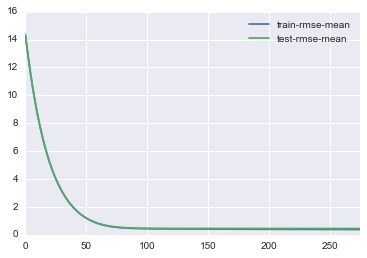

In [492]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'n_job': 8
}

xgb_cvalid = xgb.cv(params, dtrain, nfold=5, num_boost_round=2000, early_stopping_rounds=50,
    verbose_eval=20, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


In [494]:
model = xgb.train(params,dtrain,num_boost_round=276)
prediction = model.predict(dtest)
prediction = np.exp(prediction) - 1
sub = pd.DataFrame({'id':test['id'],'price_doc':prediction})
sub.to_csv('xgb_0.95_best_log1p.csv',index=False) 

# Linear scale

In [503]:
col = list(test.columns)[2:]

label = train['price_doc']* .94

dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'n_job': 8
}

xgb_cvalid = xgb.cv(params, dtrain, nfold=5, num_boost_round=2000, early_stopping_rounds=50,
    verbose_eval=20, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


[0]	train-rmse:7.77729e+06+34964.4	test-rmse:7.7828e+06+139960
[20]	train-rmse:3.66423e+06+17750.2	test-rmse:3.79751e+06+90788.9
[40]	train-rmse:2.49723e+06+11709.9	test-rmse:2.7753e+06+55028.6


KeyboardInterrupt: 

In [502]:
model = xgb.train(params,dtrain,num_boost_round=815)
prediction = model.predict(dtest)
sub = pd.DataFrame({'id':test['id'],'price_doc':prediction})
sub.to_csv('xgb_0.945_all_features.csv',index=False) 

# Truncate time

[0]	train-rmse:7.83321e+06+38497.1	test-rmse:7.83758e+06+156411
[20]	train-rmse:3.64343e+06+26489.3	test-rmse:3.78368e+06+127307
[40]	train-rmse:2.43264e+06+19827.9	test-rmse:2.72755e+06+138126
[60]	train-rmse:2.10593e+06+20890	test-rmse:2.49528e+06+140740
[80]	train-rmse:1.98562e+06+19639.3	test-rmse:2.42767e+06+139653
[100]	train-rmse:1.91487e+06+18457.5	test-rmse:2.40013e+06+139940
[120]	train-rmse:1.8612e+06+17589.1	test-rmse:2.37861e+06+139409
[140]	train-rmse:1.81449e+06+16628.4	test-rmse:2.36627e+06+141679
[160]	train-rmse:1.77123e+06+15691.6	test-rmse:2.35299e+06+144333
[180]	train-rmse:1.73408e+06+14431	test-rmse:2.34321e+06+143754
[200]	train-rmse:1.70079e+06+14182.7	test-rmse:2.33669e+06+142323
[220]	train-rmse:1.67031e+06+13039.5	test-rmse:2.33065e+06+142878
[240]	train-rmse:1.64423e+06+11929.2	test-rmse:2.32718e+06+143299
[260]	train-rmse:1.61787e+06+13304.3	test-rmse:2.32474e+06+142225
[280]	train-rmse:1.59298e+06+13308.1	test-rmse:2.32116e+06+140496
[300]	train-rmse:1.56

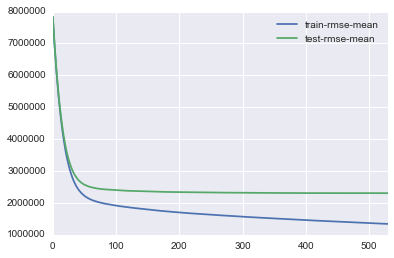

In [506]:
train = pd.read_csv('all_features_train_2.csv')
test = pd.read_csv('all_features_test_2.csv')

train = train[train['timestamp']>'2012-08-01']

col = list(test.columns)[2:]

label = train['price_doc']* .95

dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])


params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'n_job': 8
}

xgb_cvalid = xgb.cv(params, dtrain, nfold=5, num_boost_round=2000, early_stopping_rounds=50,
    verbose_eval=20, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


In [507]:
model = xgb.train(params,dtrain,num_boost_round=530)
prediction = model.predict(dtest)
sub = pd.DataFrame({'id':test['id'],'price_doc':prediction})
sub.to_csv('xgb_all_features_remove_before_201208.csv',index=False) 

[0]	train-rmse:7.96778e+06	test-rmse:7.96841e+06
[50]	train-rmse:2.9151e+06	test-rmse:3.01806e+06
[100]	train-rmse:2.45485e+06	test-rmse:2.65856e+06
[150]	train-rmse:2.28651e+06	test-rmse:2.55767e+06
[200]	train-rmse:2.18458e+06	test-rmse:2.50884e+06
[250]	train-rmse:2.10551e+06	test-rmse:2.47594e+06
[300]	train-rmse:2.04253e+06	test-rmse:2.45535e+06
[350]	train-rmse:1.98934e+06	test-rmse:2.4399e+06
[400]	train-rmse:1.93963e+06	test-rmse:2.42937e+06
[450]	train-rmse:1.89432e+06	test-rmse:2.4211e+06
[500]	train-rmse:1.8517e+06	test-rmse:2.41344e+06
[550]	train-rmse:1.81209e+06	test-rmse:2.4079e+06
[600]	train-rmse:1.77401e+06	test-rmse:2.4036e+06
[650]	train-rmse:1.73729e+06	test-rmse:2.39956e+06
[700]	train-rmse:1.7006e+06	test-rmse:2.39691e+06
[750]	train-rmse:1.66724e+06	test-rmse:2.39406e+06
[800]	train-rmse:1.63503e+06	test-rmse:2.39149e+06
[850]	train-rmse:1.60219e+06	test-rmse:2.38818e+06
[900]	train-rmse:1.57231e+06	test-rmse:2.38715e+06
[950]	train-rmse:1.54262e+06	test-rmse:2.

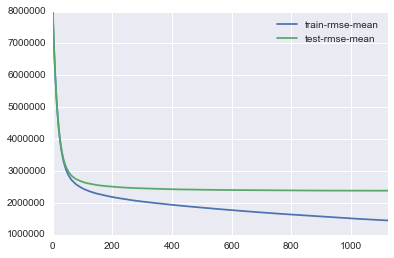

In [140]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.5,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'alpha' : 0.9,
    'lambda' : 100,
    'n_job': 8
}

xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=2000, early_stopping_rounds=50,
    verbose_eval=50, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


[0]	train-rmse:7.96405e+06	test-rmse:7.96456e+06
[50]	train-rmse:2.86125e+06	test-rmse:2.9744e+06
[100]	train-rmse:2.4107e+06	test-rmse:2.63121e+06
[150]	train-rmse:2.24628e+06	test-rmse:2.53764e+06
[200]	train-rmse:2.1466e+06	test-rmse:2.4938e+06
[250]	train-rmse:2.07075e+06	test-rmse:2.4658e+06
[300]	train-rmse:2.00786e+06	test-rmse:2.44548e+06
[350]	train-rmse:1.95284e+06	test-rmse:2.43006e+06
[400]	train-rmse:1.90214e+06	test-rmse:2.42028e+06
[450]	train-rmse:1.85629e+06	test-rmse:2.41258e+06
[500]	train-rmse:1.81411e+06	test-rmse:2.40664e+06
[550]	train-rmse:1.77376e+06	test-rmse:2.40104e+06
[600]	train-rmse:1.73616e+06	test-rmse:2.3972e+06
[650]	train-rmse:1.69862e+06	test-rmse:2.39327e+06
[700]	train-rmse:1.66235e+06	test-rmse:2.39062e+06
[750]	train-rmse:1.62889e+06	test-rmse:2.38735e+06
[800]	train-rmse:1.59564e+06	test-rmse:2.38469e+06
[850]	train-rmse:1.56373e+06	test-rmse:2.38235e+06
[900]	train-rmse:1.53485e+06	test-rmse:2.38186e+06
[950]	train-rmse:1.50453e+06	test-rmse:2

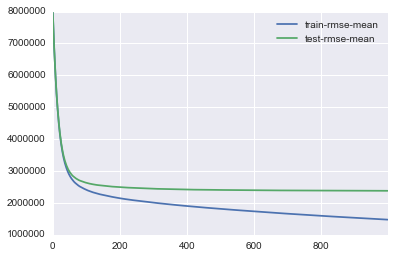

In [138]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.5,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'alpha' : 0.9,
    'lambda' : 100,
    'n_job': -1
}

xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=50,
    verbose_eval=50, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


[0]	train-rmse:7.93437e+06+46371.4	test-rmse:7.93742e+06+94836.6
[50]	train-rmse:2.82809e+06+30238.7	test-rmse:3.15218e+06+71720.4
[100]	train-rmse:2.02853e+06+27931.5	test-rmse:2.6027e+06+91500.6
[150]	train-rmse:1.86849e+06+26584.8	test-rmse:2.53804e+06+103588
[200]	train-rmse:1.77811e+06+23202.6	test-rmse:2.51469e+06+108773
[250]	train-rmse:1.70137e+06+18822	test-rmse:2.50231e+06+108897
[300]	train-rmse:1.63476e+06+18074.9	test-rmse:2.49391e+06+107601
[350]	train-rmse:1.57220e+06+18086.2	test-rmse:2.48873e+06+105337
[400]	train-rmse:1.51661e+06+18890.8	test-rmse:2.48483e+06+105472
[450]	train-rmse:1.46414e+06+19988.1	test-rmse:2.48266e+06+105385
[500]	train-rmse:1.41787e+06+19345.5	test-rmse:2.48093e+06+105291
[550]	train-rmse:1.3725e+06+18970.9	test-rmse:2.47909e+06+104735
[600]	train-rmse:1.32643e+06+20164.9	test-rmse:2.47763e+06+103774
[650]	train-rmse:1.28553e+06+17863.9	test-rmse:2.47675e+06+103079
Performance does not improve from 681 rounds


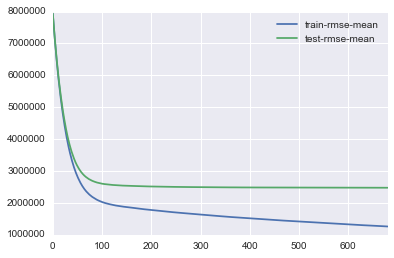

In [100]:
params = {
    'eta': 0.03, ## Try 0.01,3,5
    'max_depth': 6,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}


[0]	train-rmse:7.86292e+06	test-rmse:7.86719e+06
[50]	train-rmse:2.37853e+06	test-rmse:2.81317e+06
[100]	train-rmse:1.90356e+06	test-rmse:2.54983e+06
[150]	train-rmse:1.78313e+06	test-rmse:2.51574e+06
[200]	train-rmse:1.68427e+06	test-rmse:2.49999e+06
[250]	train-rmse:1.59795e+06	test-rmse:2.49049e+06
[300]	train-rmse:1.52828e+06	test-rmse:2.48426e+06
[350]	train-rmse:1.45752e+06	test-rmse:2.48072e+06
[400]	train-rmse:1.39464e+06	test-rmse:2.47812e+06
[450]	train-rmse:1.33556e+06	test-rmse:2.47628e+06
[500]	train-rmse:1.28238e+06	test-rmse:2.47591e+06
Performance does not improve from 482 rounds


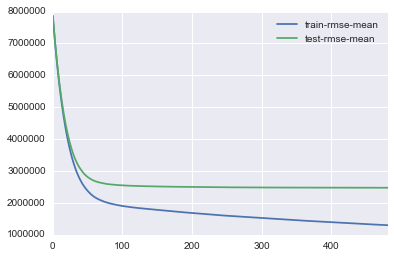

In [74]:
params = {
    'eta': 0.04, ## Try 0.01,3,5
    'max_depth': 6,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}


In [ ]:
# xgb_0.95label_tsne_kremlin_others_macro_feature.csv     

# train-rmse:7.86393e+06	test-rmse:7.87001e+06[50]	
# train-rmse:2.42942e+06	test-rmse:2.86217e+06[100]	
# train-rmse:1.93432e+06	test-rmse:2.57665e+06[150]	
# train-rmse:1.79341e+06	test-rmse:2.53049e+06[200]
# train-rmse:1.7012e+06	test-rmse:2.50865e+06[250]	
# train-rmse:1.62239e+06	test-rmse:2.49908e+06[300]	
# train-rmse:1.55594e+06	test-rmse:2.49399e+06[350]	
# train-rmse:1.49592e+06	test-rmse:2.4913e+06[400]	
# train-rmse:1.44098e+06	test-rmse:2.48815e+06
        
# Performance does not improve from 410 rounds



In [79]:
params = {
    'eta': 0.04, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# [0]	train-rmse:7.86611e+06	test-rmse:7.8694e+06
# [50]	train-rmse:2.59709e+06	test-rmse:2.90699e+06
# [100]	train-rmse:2.13925e+06	test-rmse:2.61148e+06
# [150]	train-rmse:2.011e+06	test-rmse:2.56209e+06
# [200]	train-rmse:1.93349e+06	test-rmse:2.54176e+06
# [250]	train-rmse:1.87026e+06	test-rmse:2.52803e+06
# [300]	train-rmse:1.81406e+06	test-rmse:2.52078e+06
# [350]	train-rmse:1.76709e+06	test-rmse:2.51479e+06
# [400]	train-rmse:1.72375e+06	test-rmse:2.51177e+06
# [450]	train-rmse:1.68409e+06	test-rmse:2.50767e+06
# Performance does not improve from 459 rounds

[0]	train-rmse:7.86327e+06	test-rmse:7.86786e+06
[50]	train-rmse:2.43489e+06	test-rmse:2.8573e+06
[100]	train-rmse:1.94815e+06	test-rmse:2.57587e+06
[150]	train-rmse:1.82107e+06	test-rmse:2.53656e+06
[200]	train-rmse:1.74036e+06	test-rmse:2.51955e+06
[250]	train-rmse:1.67146e+06	test-rmse:2.51104e+06
[300]	train-rmse:1.60932e+06	test-rmse:2.50646e+06
[350]	train-rmse:1.55534e+06	test-rmse:2.50359e+06
[400]	train-rmse:1.50669e+06	test-rmse:2.50226e+06
[450]	train-rmse:1.45907e+06	test-rmse:2.49994e+06
Performance does not improve from 455 rounds


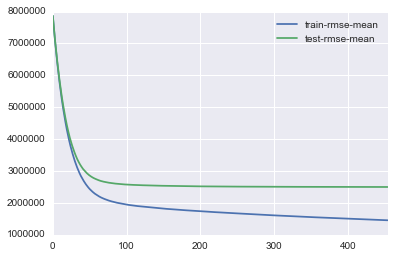

In [85]:
params = {
    'eta': 0.04, ## Try 0.01,3,5
    'max_depth': 6,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=True,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')


# all features
# [0]	train-rmse:7.86327e+06	test-rmse:7.86786e+06
# [50]	train-rmse:2.43489e+06	test-rmse:2.8573e+06
# [100]	train-rmse:1.94815e+06	test-rmse:2.57587e+06
# [150]	train-rmse:1.82107e+06	test-rmse:2.53656e+06
# [200]	train-rmse:1.74036e+06	test-rmse:2.51955e+06
# [250]	train-rmse:1.67146e+06	test-rmse:2.51104e+06
# [300]	train-rmse:1.60932e+06	test-rmse:2.50646e+06
# [350]	train-rmse:1.55534e+06	test-rmse:2.50359e+06
# [400]	train-rmse:1.50669e+06	test-rmse:2.50226e+06
# [450]	train-rmse:1.45907e+06	test-rmse:2.49994e+06
# Performance does not improve from 455 rounds

In [146]:
model = xgb.train(params,dtrain,num_boost_round=len(xgb_cvalid))
#model = xgb.train(params,dtrain,num_boost_round=700)

In [147]:
prediction = model.predict(dtest)
sub = pd.DataFrame({'id':test['id'],'price_doc':prediction})

In [148]:
sub.to_csv('xgb_0.95label_all_feature_data_clean_interactive_big_lambda_sample_05_1124_round.csv',index=False)

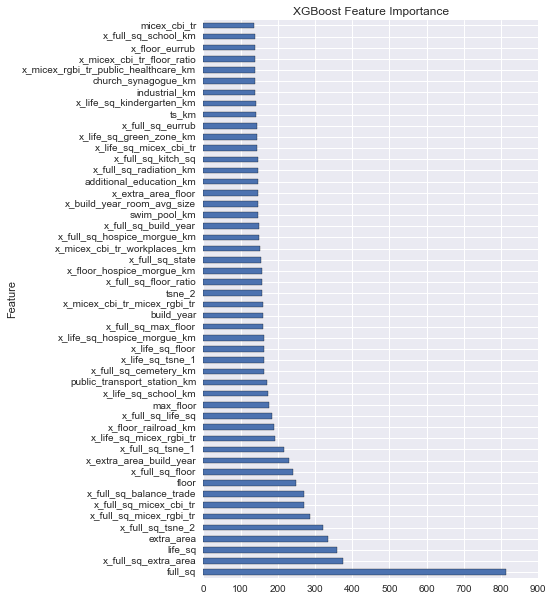

In [149]:
def get_feature_importance(model):
    Importance = model.get_fscore()
    Importance = list(Importance.items())
    Feature= []
    Score = []
    for each in Importance:
        Feature.append(each[0])
        Score.append(each[1])
    df = pd.DataFrame({'Feature':Feature,'Score':Score}).sort_values(by=['Score'],ascending=[0])
    return df  

def plot_importance(model):
    FImportance = get_feature_importance(model).iloc[0:50,]
    plt.figure()
    FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.show()
    
plot_importance(model)

In [395]:
get_feature_importance(model).to_csv('feature_importance.csv', index=False)

In [398]:
feature_importance = get_feature_importance(model)
feature_importance[feature_importance['Score'] > 100].shape

(123, 2)

In [399]:
feature_importance

,Feature,Score
248,full_sq,813
163,x_full_sq_extra_area,375
75,life_sq,359
79,extra_area,336
218,x_full_sq_tsne_2,322
145,x_full_sq_micex_rgbi_tr,286
20,x_full_sq_micex_cbi_tr,271
309,x_full_sq_balance_trade,270
403,floor,249
233,x_full_sq_floor,240
